In [9]:
import pandas as pd
import numpy as np
%matplotlib inline
import sys
sys.path.insert(0, '/home/tomek/ib_tools/')
from indicators import get_signals
from utils import chart_price, plot, perf, v_backtester, c_backtester, perf_var

In [10]:
data = pd.read_pickle('freeze/freeze_df_NQH0.pickle')

In [11]:
data

,backfill,open,high,low,close,price,volume,ema_fast,ema_slow,atr,signal,filter,filtered_signal
date,,,,,,,,,,,,,
2018-12-13 02:24:00,True,6769.00,6793.75,6768.00,6786.75,6786.75,10028,NaN,NaN,25.750000,0.0,NaN,0.0
2018-12-13 04:24:00,True,6786.25,6814.75,6778.75,6809.75,6809.75,10012,NaN,NaN,30.903472,0.0,NaN,0.0
2018-12-13 07:47:00,True,6809.50,6822.25,6797.00,6821.00,6821.00,10048,NaN,NaN,28.998004,0.0,NaN,0.0
2018-12-13 09:19:00,True,6821.75,6837.75,6808.25,6822.00,6822.00,10091,6815.123077,NaN,29.125602,0.0,NaN,0.0
2018-12-13 10:15:00,True,6821.75,6825.75,6785.00,6788.25,6788.25,10082,6804.806872,NaN,31.502431,0.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-30 21:45:00,False,6805.25,6812.50,6797.75,6810.25,6810.25,11273,6810.483897,6720.587938,17.023234,0.0,1.0,0.0
2019-01-30 21:55:00,False,6810.25,6814.25,6800.25,6812.50,6812.50,10736,6811.155931,6722.107146,16.989828,0.0,1.0,0.0
2019-01-30 21:59:00,False,6812.50,6814.75,6808.50,6814.50,6814.50,10746,6812.270621,6723.634300,16.871156,0.0,1.0,0.0


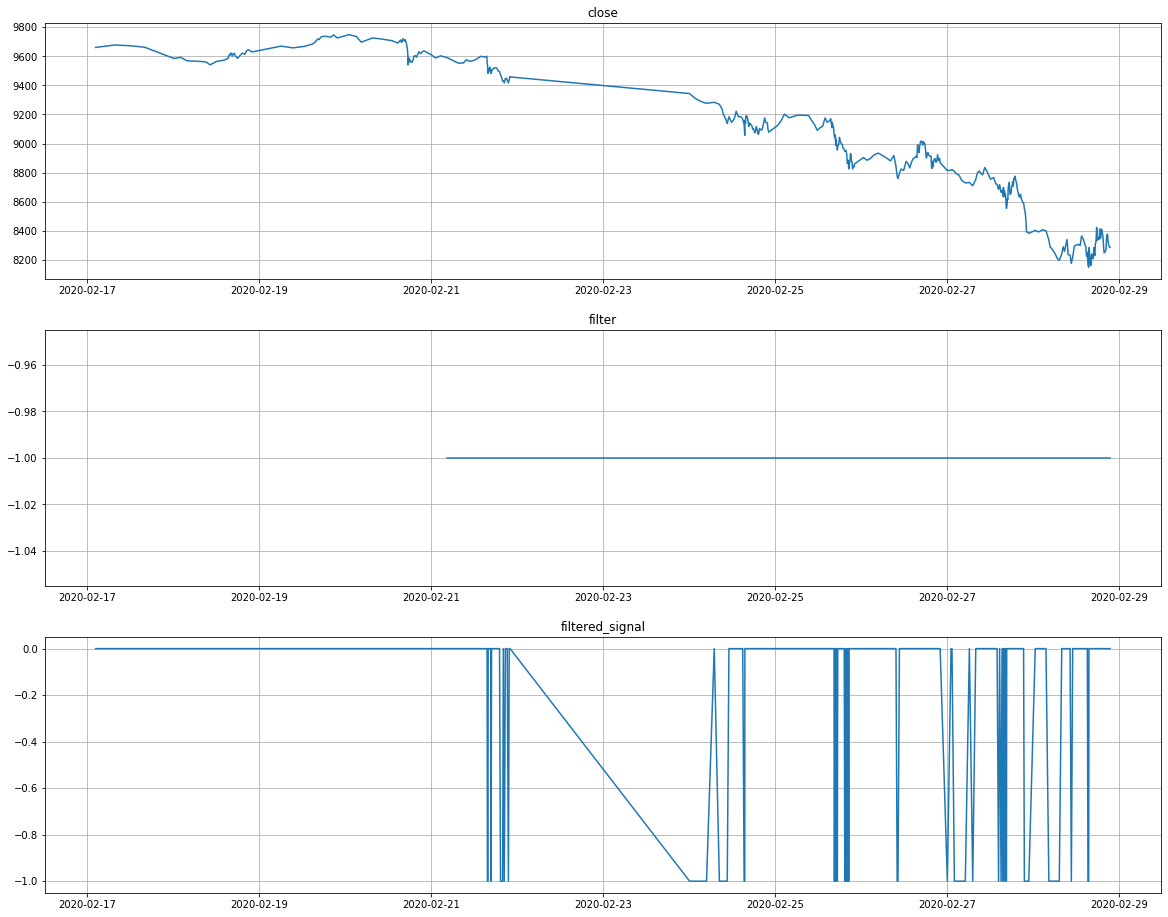

In [6]:
plot(data[['close', 'filter', 'filtered_signal']]);

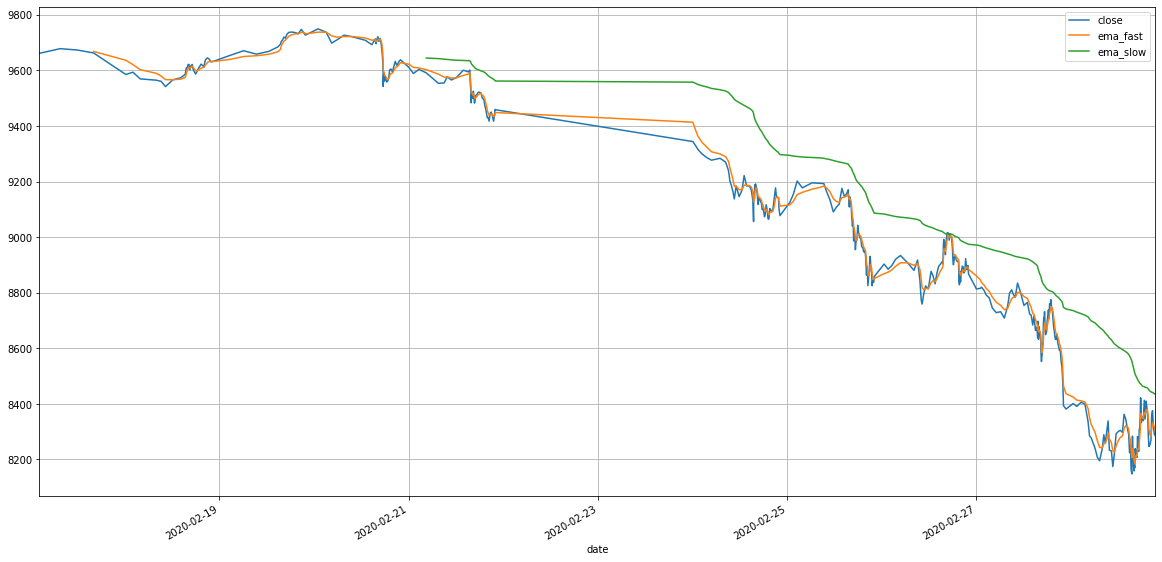

In [7]:
data[['close', 'ema_fast', 'ema_slow']].plot(figsize=(20,10), grid=True);

In [8]:
data.loc['20200228 15:00':]

,backfill,open,high,low,close,price,volume,ema_fast,ema_slow,atr,signal,filter,filtered_signal
date,,,,,,,,,,,,,
2020-02-28 15:06:00,False,8224.75,8258.75,8202.00,8249.75,8249.75,20459,8270.861582,8567.306493,55.694570,0.0,-1.0,0.0
2020-02-28 15:17:30,False,8250.25,8255.50,8160.25,8162.75,8162.75,20129,8234.824388,8560.614179,56.135482,-1.0,-1.0,-1.0
2020-02-28 15:29:00,False,8164.50,8180.75,8129.00,8148.00,8148.00,20339,8205.882925,8553.788663,56.086603,-1.0,-1.0,-1.0
2020-02-28 15:33:00,False,8147.75,8280.00,8126.25,8245.50,8245.50,19916,8219.088617,8548.688981,57.175017,0.0,-1.0,0.0
2020-02-28 15:38:00,False,8245.00,8322.00,8230.00,8284.00,8284.00,20882,8240.725745,8544.310577,57.563089,0.0,-1.0,0.0
2020-02-28 15:44:30,False,8284.25,8314.75,8236.25,8236.25,8236.25,21496,8239.233830,8539.214799,57.796378,0.0,-1.0,0.0
2020-02-28 15:49:30,False,8235.75,8278.50,8206.25,8231.25,8231.25,20254,8236.572553,8534.120670,57.957411,0.0,-1.0,0.0
2020-02-28 15:55:30,False,8230.75,8256.75,8171.50,8174.75,8174.75,20854,8215.965035,8528.176295,58.261461,0.0,-1.0,0.0
2020-02-28 16:02:00,False,8175.25,8205.00,8153.00,8158.75,8158.75,20719,8196.893357,8522.065663,58.191713,0.0,-1.0,0.0


In [9]:
data.loc['20180206':].head(50)

,backfill,open,high,low,close,price,volume,ema_fast,ema_slow,atr,signal,filter,filtered_signal
date,,,,,,,,,,,,,
2018-02-06 00:40:00,False,6455.25,6495.50,6441.50,6471.75,6471.75,10079,6462.045782,6700.248043,26.255538,0.0,-1.0,0.0
2018-02-06 01:20:00,False,6471.75,6474.25,6415.00,6472.50,6472.50,10162,6465.530521,6696.483610,26.620149,0.0,-1.0,0.0
2018-02-06 02:30:00,False,6472.00,6473.50,6406.50,6422.25,6422.25,10054,6451.103681,6691.950819,27.066373,0.0,-1.0,0.0
2018-02-06 02:55:00,False,6421.50,6430.75,6297.00,6311.50,6311.50,10586,6404.569121,6685.662371,28.245296,-1.0,-1.0,-1.0
2018-02-06 03:18:00,False,6311.25,6374.25,6280.00,6358.75,6358.75,10115,6389.296080,6680.258857,28.974690,0.0,-1.0,0.0
2018-02-06 04:10:00,False,6358.50,6360.00,6305.25,6340.00,6340.00,10030,6372.864054,6674.634739,29.259523,0.0,-1.0,0.0
2018-02-06 05:20:00,False,6339.00,6354.00,6260.25,6286.75,6286.75,10018,6344.159369,6668.223417,29.972183,-1.0,-1.0,-1.0
2018-02-06 06:09:00,False,6285.75,6363.50,6269.25,6354.50,6354.50,10454,6347.606246,6663.037902,30.682492,0.0,-1.0,0.0
2018-02-06 06:52:00,False,6356.50,6437.25,6350.25,6428.75,6428.75,10030,6374.654164,6659.165372,31.304834,0.0,-1.0,0.0


In [ ]:
data['long'] = data['filtered_signal'] > 0
data['short'] = data['filtered_signal'] < 0
data['out'] = data['filtered_signal'] == 0
data['long'] = data['long'] * data['price']
data['short'] = data['short'] * data['price']
data['out'] = data['out'] * data['price']
data[['long', 'short', 'out']] = data[['long', 'short', 'out']].replace({0:np.nan})
data.tail()

In [ ]:
data[['long', 'short', 'out']].plot(figsize=(20, 10), grid=True);

In [ ]:
periods = [10, 20, 40, 80, ]

In [ ]:
min_max = pd.DataFrame({'close': data.price})

In [ ]:
min_max

In [ ]:
for p in periods:
    min_max[f'min_{p}'] = min_max.close.rolling(p).min()
    #min_max[f'max_{p}'] = min_max.close.rolling(p).max()

In [ ]:
min_max.plot(figsize=(18, 9), grid=True);

In [ ]:
data[data['signal'] != 0].loc['20190927':].head(50)

In [ ]:
data[data['signal'] != 0].tail(60)

In [ ]:
averages = pd.DataFrame({'price': data.price,
                       'ema_fast': data.price.ewm(span=100).mean(),
                       'ema_slow': data.price.ewm(span=160).mean()})

In [ ]:
averages.plot(figsize=(18,9), grid=True);

In [ ]:
data.loc['20180221':].head(50)